# Demonstration of Multivariate Time Series Forecasting (Household Electric Power Consumption Dataset)--Long Short-Term Memory (LSTM) Network ) -- Preprocessing/Exploratory -- Keras Time Series Generator 

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**STRUCTURE**

*The first part of this demonstration (**PART A**) is focused on data preparation/manipulation of the imported dataset features('.txt' file format) to apply basic data preprocessing/cleaning methods by converting the dataset into a dataframe (pandas). In addition, an exploratory analysis is presented to highlight key aspects of each selected 'Electric Power Consumption' dataset feature past (time series) behavior, so as to get meaningful insights with respect to its distribution, correlations with the other examined features, its behavior when grouped at different time periods and the change of its statistical properties over time.*

*The scope of the second part of this project (**Part B**) is to demonstrate the use of the LSTM model for multivariate time series forecasting. A new dataset is  created that consists of four dataset features (Global Active Power, Global Reactive Power, Global Intensity and Voltage) grouped my their mean (average) weekly values.  These features are to be split into two sets (training and test) so as to use their past observations as inputs to the deep learning model in order to investigate the LSTM predictive capabilities by training this deep learning neural network with 4 years of past average weekly values of the aforementioned dataset features to predict their average weekly values for the next 52 weeks (prediction horizon of 1 year). The evaluation of the LSTM model performance for the cases where the prediction horizon is known is based on the comparison of the forecasted values with the test(actual/target)values (Performance Metric --> Root Mean Squared Error).* 


**The Dataset (.txt file format) for this project has been obtained from Kaggle:**

"*Household Electric Power Consumption*" -- File: "household_power_consumption.txt" -- Source: https://www.kaggle.com/uciml/electric-power-consumption-data-set 



# Part A


### Data Preparation-Exploratory

*In Part A, basic data preprocessing/cleaning techniques are applied(i.e. use of numpy and pandas for columns concatenation,creation of datetime object and use as index, dropping uneccessary dataset features,identification/handling of missing values,dtype conversions). In addition an exploratory analysis is provided so as to perform initial investigations on data in order to discover patterns and to explore/highlight the relationships between the different features with the help of statistics and graphical representations. Moreover, the rolling Mean & St.Deviation of the selected dataset time series are determined and there is also use of the ADF (Augmented Dickey-Fuller) test so as to observe how the statistical properties of the aforementioned time series change over time (stationary or non stationary).*

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Importing the dataset and conversion from '.txt' to 'csv.' file format by use of delimiter for feature (column) separation
data=pd.read_csv('household_power_consumption.txt',delimiter=';')

C:\Users\geoto\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Dataset consists of 9 columns, 8 of 'object' type and 1 of 'float' type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [4]:
# Dataset first 5 rows
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
# Concatenating the 'Date' and 'Time' column
data['Date']=pd.to_datetime(data['Date'] + ' ' + data['Time'])

In [6]:
# 'Date' column comprising date and time 
data['Date'].head()

0   2006-12-16 17:24:00
1   2006-12-16 17:25:00
2   2006-12-16 17:26:00
3   2006-12-16 17:27:00
4   2006-12-16 17:28:00
Name: Date, dtype: datetime64[ns]

In [7]:
# Due to 'Date' column 'datetime' conversion, the Time' column can be dropped
data=data.drop('Time',axis=1)

In [8]:
# Use of pd.to_datetime to change the period of observations to 'Week'
data['Date'] = pd.to_datetime(data['Date']).dt.to_period('W')

In [9]:
# The 'Date' column has been updated
data.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-11/2006-12-17,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-11/2006-12-17,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-11/2006-12-17,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-11/2006-12-17,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-11/2006-12-17,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [10]:
# Identification of possible dataset columns comprising missing records ('NaN' values) by determining the percentage of missing
# values with respect to the length of the dataset. As it can be observed,'Sub_metering_3' column has a small percentage of
# missing records (1.25%)
missing_values_perc=100*(data.isnull().sum()/len(data))
missing_values_perc

Date                     0.000000
Global_active_power      0.000000
Global_reactive_power    0.000000
Voltage                  0.000000
Global_intensity         0.000000
Sub_metering_1           0.000000
Sub_metering_2           0.000000
Sub_metering_3           1.251844
dtype: float64

In [11]:
# Due to the small percentage of missing values, the rows corresponding to the 'NaN' records are dropped
data=data.dropna()
# Dataset has been updated - Rows with 'Missing' entries have now been removed
data.isnull().sum()

Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
# Dataset features dtype conversion from 'object' to 'float'. The only exception is the 'Date' column that is to be used as the
# index of the dataset
data.iloc[:,1:]=data.iloc[:,1:].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 8 columns):
Date                     period[W-SUN]
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7), period[W-SUN](1)
memory usage: 140.7 MB


In [13]:
# Dataset entries are grouped by 'Date' based on their mean weekly value in order to reduce the number of entries that contained
# records of 1 minute period. 'Date' is now the index of the dataset
data=data.groupby('Date').mean()
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-11/2006-12-17,2.505248,0.142118,239.258088,10.664161,1.107298,2.577887,9.949346
2006-12-18/2006-12-24,1.734186,0.116707,241.369734,7.341973,1.110339,2.118575,7.684759
2006-12-25/2006-12-31,1.958376,0.144109,241.910219,8.238043,1.412681,2.245287,6.671661
2007-01-01/2007-01-07,1.152170,0.109718,238.848376,4.885524,1.068856,0.860105,6.093263
2007-01-08/2007-01-14,1.422602,0.146245,238.996149,6.068642,2.438457,1.494035,6.925731


In [14]:
# New dataset shape
data.shape

(209, 7)

In [15]:
# A new dataset column is created comprising the month of each record
data['Month']=data.index.month
# A new dataset column is created comprising the year of each record
data['Year']=data.index.year
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Year
Date,,,,,,,,,
2006-12-11/2006-12-17,2.505248,0.142118,239.258088,10.664161,1.107298,2.577887,9.949346,12,2006
2006-12-18/2006-12-24,1.734186,0.116707,241.369734,7.341973,1.110339,2.118575,7.684759,12,2006
2006-12-25/2006-12-31,1.958376,0.144109,241.910219,8.238043,1.412681,2.245287,6.671661,12,2006
2007-01-01/2007-01-07,1.152170,0.109718,238.848376,4.885524,1.068856,0.860105,6.093263,1,2007
2007-01-08/2007-01-14,1.422602,0.146245,238.996149,6.068642,2.438457,1.494035,6.925731,1,2007


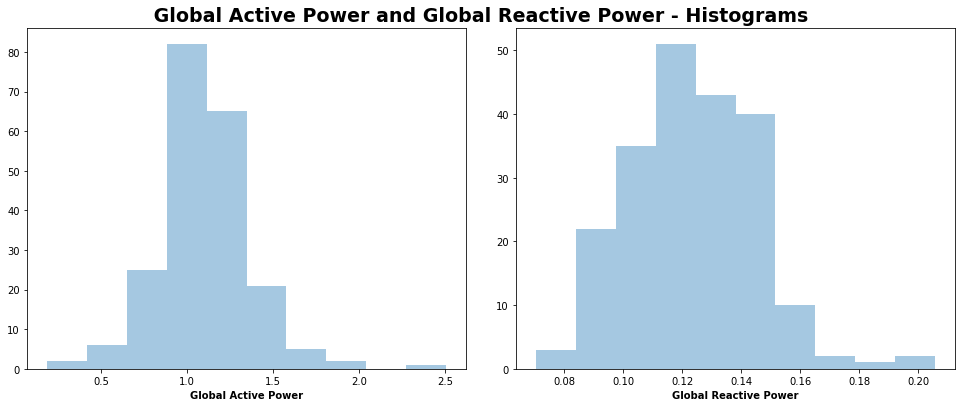

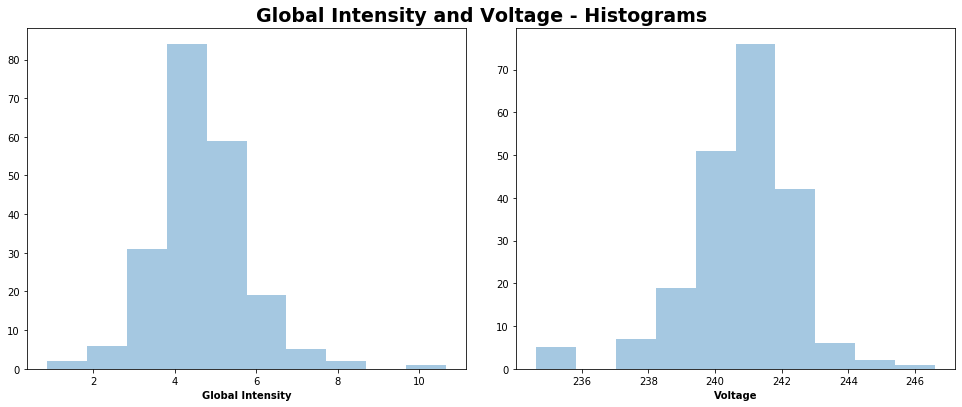

In [16]:
# Histograms of the examined dataset features that provide useful insights regarding the range of values of those 
# parameters and the total number of weeks that these values (or range of values) are have been observed
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(14,6)

fig.suptitle(" Global Active Power and Global Reactive Power - Histograms ", fontweight='bold',fontsize=19)
sns.distplot(data['Global_active_power'],kde=False,bins=10,ax=ax1)
ax1.set_xlabel('Global Active Power',fontweight='bold')
sns.distplot(data['Global_reactive_power'],kde=False,bins=10,ax=ax2)
ax2.set_xlabel('Global Reactive Power',fontweight='bold')
ax1,ax2.figure.tight_layout(pad=3)


fig,(ax3,ax4)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(14,6)
fig.suptitle("Global Intensity and Voltage - Histograms", fontweight='bold',fontsize=19)
sns.distplot(data['Global_intensity'],kde=False,bins=10,ax=ax3)
ax3.set_xlabel('Global Intensity',fontweight='bold')
sns.distplot(data['Voltage'],kde=False,bins=10,ax=ax4)
ax4.set_xlabel('Voltage',fontweight='bold');
ax3,ax4.figure.tight_layout(pad=3);



In [17]:
# Global_active_power values between 0.7 and 1.3 correspond to approximately 76% of the total number of dataset's weeks
100 *(data['Global_active_power'][(data['Global_active_power']>=0.7)&
                                  (data['Global_active_power']<=1.3)].count()/len(data))

76.07655502392345

In [18]:
# Global_reactive_power values between 0.1 and 0.15 correspond to approximately 77% of the total number of dataset's weeks
100*(data['Global_reactive_power'][(data['Global_reactive_power']>=0.1)&
                                   (data['Global_reactive_power']<=0.15)].count()/len(data))

77.03349282296651

In [19]:
# Global_intensity values between 3 and 6 correspond to approximately 84.2% of the total number of dataset's weeks
100 *(data['Global_intensity'][(data['Global_intensity']>=3)&
                                  (data['Global_intensity']<=6)].count()/len(data))

84.21052631578947

In [20]:
# Voltage values between 240 and 243 correspond to approximately 76.5% of the total number of dataset's weeks
100 *(data['Voltage'][(data['Voltage']>=240)&
                                  (data['Voltage']<=243)].count()/len(data))

76.55502392344498

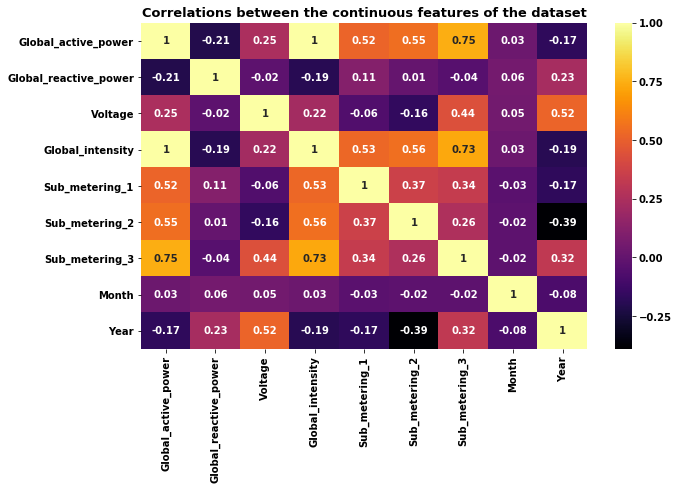

In [21]:
# Heatmap displaying the correlations between the continuous features of the household electric power consumption dataset.
# Correlation varies between -1 and 1, where a) values close to 1 indicate positive correlation, b) values close to -1
# indicate negative correlation between two variables. For instance, it can be observed that the 'Global_active_power' 
# feature has a strong correlation of 1 with the 'Global_intensity' feature. On the other hand the correlation between
# the 'Global_reactive_power' feature and the 'Voltage' feature is very weak as it is almost 0 (-0.02), meaning that the
# behaviour of one of those parameters does not have any significant, positive or negative, effect on the other.
plt.figure(figsize=(10,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=10
plt.title('Correlations between the continuous features of the dataset',fontweight='bold',fontsize = 13)
sns.heatmap(data.corr().round(2),annot=True,cmap='inferno');

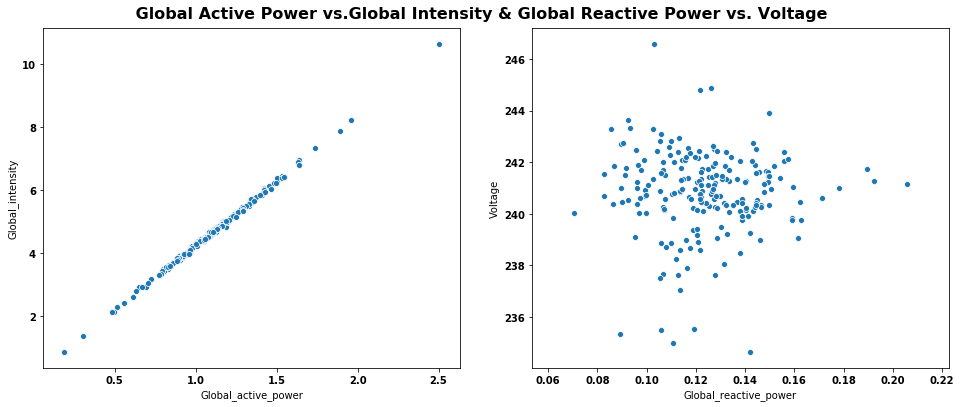

In [22]:
# In the first scatterplot, the strong correlation between Global Active Power and Global Intensity is observed due to their
# linear relationship. On the other hand, the 'weak' correlation(value ~ zero) between Voltage and Global Reactive Power
# is reflected on the second scatterplot
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(14,6)
fig.suptitle(" Global Active Power vs.Global Intensity & Global Reactive Power vs. Voltage ", fontweight='bold',fontsize=16)
sns.scatterplot(x='Global_active_power',y='Global_intensity',data=data,ax=ax1)
sns.scatterplot(x='Global_reactive_power',y='Voltage',data=data,ax=ax2)
ax1,ax2.figure.tight_layout(pad=3);


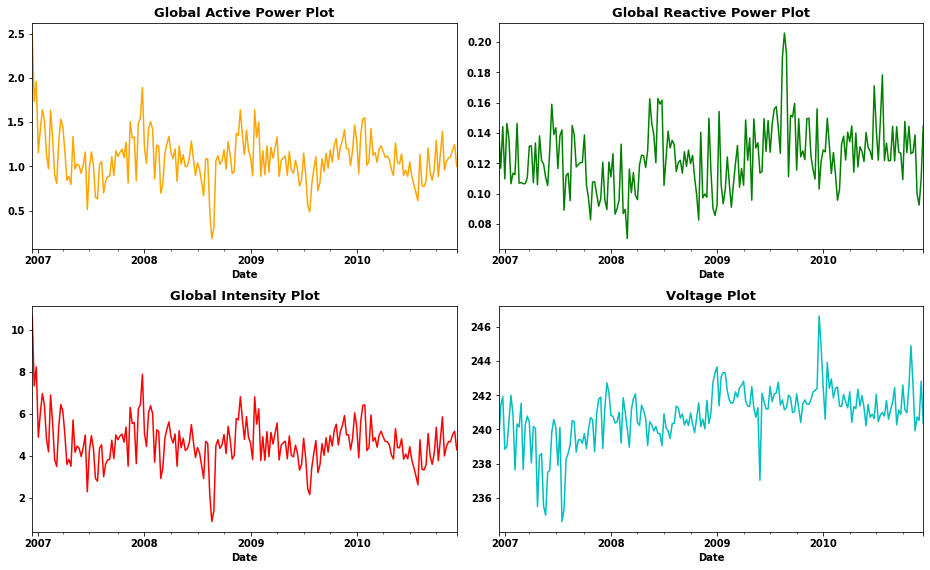

In [23]:
# Average Weekly value Plots of Global Active Power, Global Reactive Power,Global Intensity and Voltage from 2006-12 to 2010-12
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13,8))

data['Global_active_power'].plot(ax=axes[0,0],color='orange')
axes[0,0].set_title('Global Active Power Plot',fontweight='bold',fontsize=13)


data['Global_reactive_power'].plot(ax=axes[0,1],color='g')
axes[0,1].set_title('Global Reactive Power Plot',fontweight='bold',fontsize=13)


data['Global_intensity'].plot(ax=axes[1,0],color='r')
axes[1,0].set_title('Global Intensity Plot',fontweight='bold',fontsize=13)


data['Voltage'].plot(ax=axes[1,1],color='c')
axes[1,1].set_title('Voltage Plot',fontweight='bold',fontsize=13)


for ax in axes.flat:
    
    ax.figure.tight_layout(pad=1)
    ax.set_xlabel('Date',fontweight='bold')


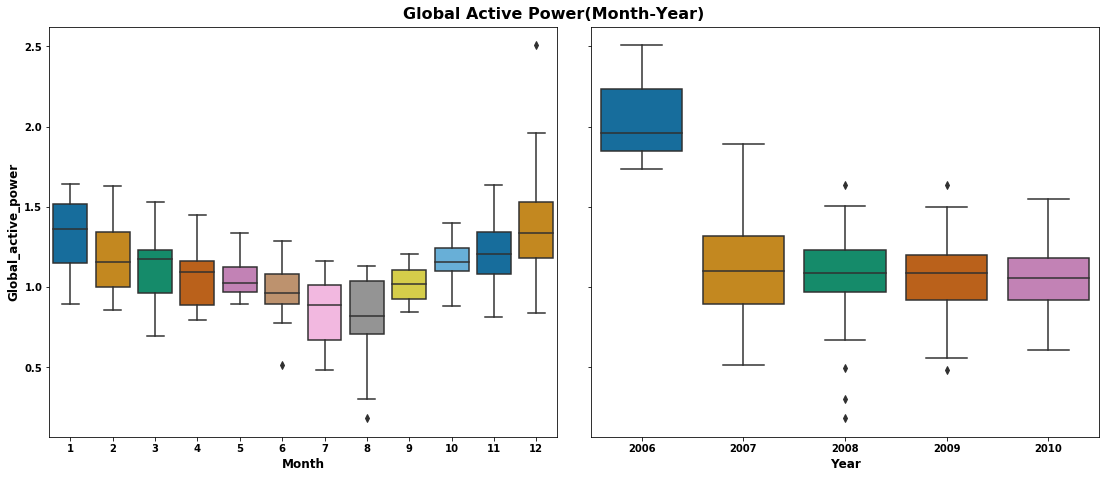

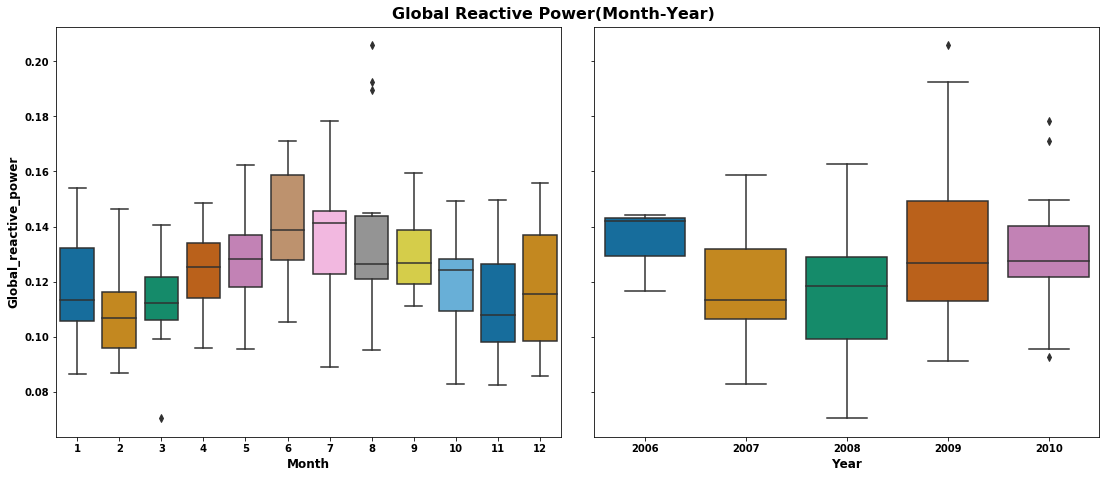

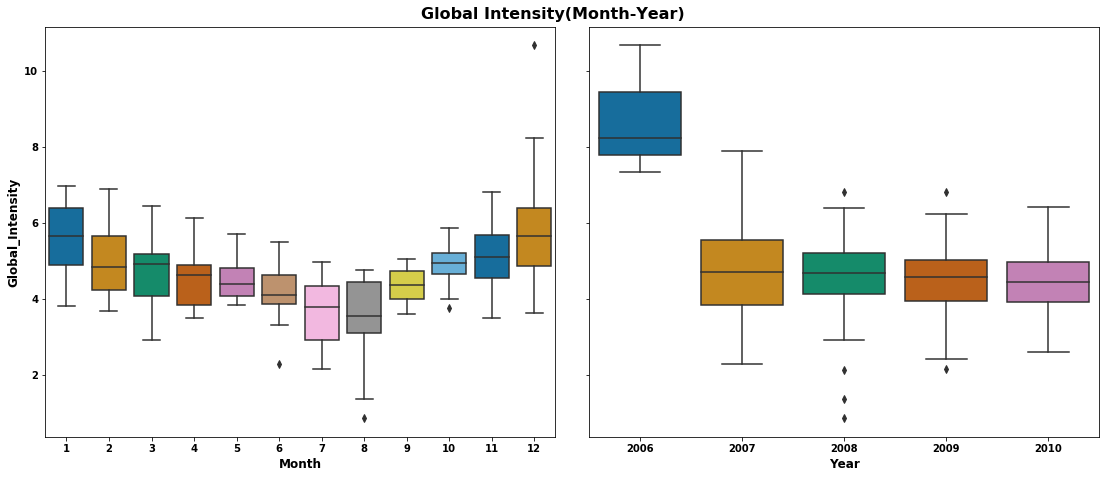

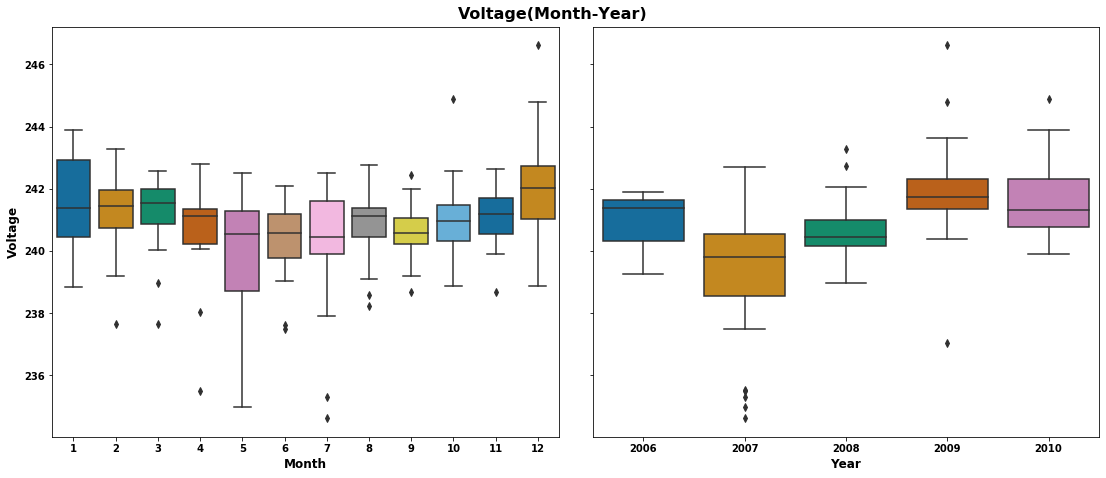

In [24]:
# Boxplots providing the interquartile range(median,25% and 75% percentiles), the minimum, maximum values and outliers of the
# examined variables when grouped by a)month and b)year
fig,(ax1,ax2)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(16,7)
fig.suptitle("Global Active Power(Month-Year)", fontweight='bold',fontsize=16)
sns.boxplot(data=data, x='Month', y='Global_active_power', palette='colorblind',ax=ax1)
sns.boxplot(data=data, x='Year', y='Global_active_power',palette='colorblind', ax=ax2)
ax1.set_xlabel('Month',fontweight='bold',fontsize=12)
ax2.set_xlabel('Year',fontweight='bold',fontsize=12)
ax1.set_ylabel('Global_active_power',fontsize=12,fontweight='bold')

ax1,ax2.label_outer()
ax1,ax2.figure.tight_layout(pad=3)


fig,(ax3, ax4)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(16,7)
fig.suptitle("Global Reactive Power(Month-Year)", fontweight='bold',fontsize=16)
sns.boxplot(data=data, x='Month', y='Global_reactive_power',palette='colorblind', ax=ax3)
sns.boxplot(data=data, x='Year', y='Global_reactive_power',palette='colorblind', ax=ax4)
ax3.set_xlabel('Month',fontweight='bold',fontsize=12)
ax4.set_xlabel('Year',fontweight='bold',fontsize=12)
ax3.set_ylabel('Global_reactive_power',fontsize=12,fontweight='bold')
ax3,ax4.label_outer()
ax3,ax4.figure.tight_layout(pad=3)



fig,(ax5, ax6)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(16,7)
fig.suptitle("Global Intensity(Month-Year)", fontweight='bold',fontsize=16)
sns.boxplot(data=data, x='Month', y='Global_intensity',palette='colorblind', ax=ax5)
sns.boxplot(data=data, x='Year', y='Global_intensity',palette='colorblind', ax=ax6)
ax5.set_xlabel('Month',fontweight='bold',fontsize=12)
ax6.set_xlabel('Year',fontweight='bold',fontsize=12)
ax5.set_ylabel('Global_Intensity',fontsize=12,fontweight='bold')
ax5,ax6.label_outer()
ax5,ax6.figure.tight_layout(pad=3)



fig,(ax7,ax8)= plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(16,7)
fig.suptitle("Voltage(Month-Year)", fontweight='bold',fontsize=16)
sns.boxplot(data=data, x='Month', y='Voltage', palette='colorblind',ax=ax7)
sns.boxplot(data=data, x='Year', y='Voltage',palette='colorblind', ax=ax8)
ax7.set_xlabel('Month',fontweight='bold',fontsize=12)
ax8.set_xlabel('Year',fontweight='bold',fontsize=12)
ax7.set_ylabel('Voltage',fontsize=12,fontweight='bold')
ax7,ax8.label_outer()
ax7,ax8.figure.tight_layout(pad=3)
plt.show();

    


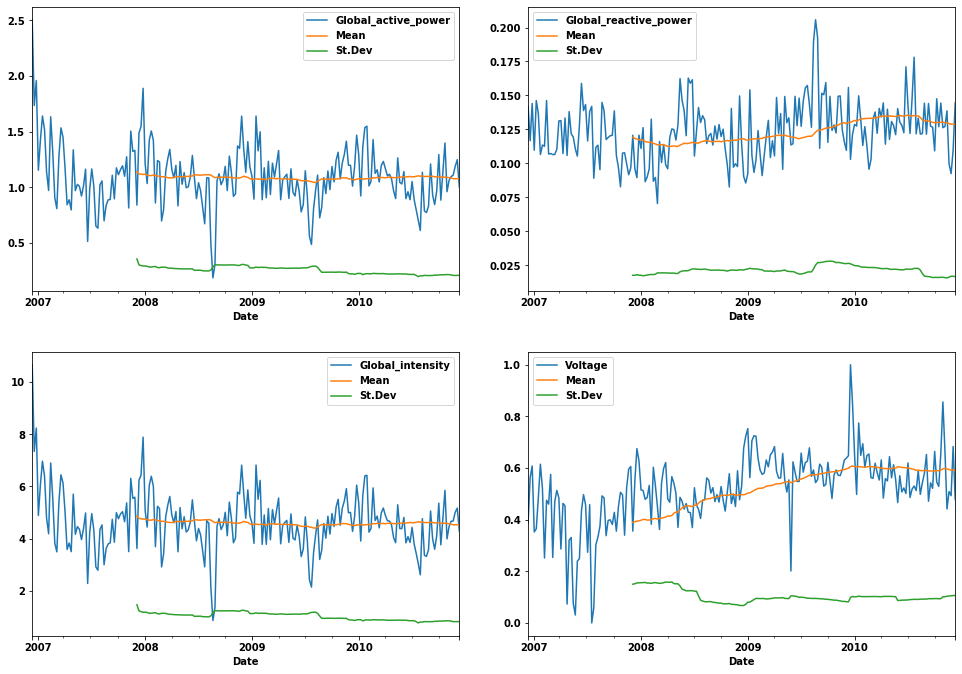

In [25]:
# Calculation of rolling mean and St.Dev with respect to the values of the examined features to observe how these statistical
# properties of the aforementioned time series change over time.
# As far as the Global Active Power,Global Reactive Power and Global Intensity are concerned, they exhibit small variations 
# with the respect to their rolling mean and variance, thus these patterns seem to be stationary
# In terms of the 'Voltage' feature, its rolling mean increases over time and in addition,St.Dev exhibit small deviations from 
# its initial rolling value over time(small fluctuations of St.Dev are observed). As its rolling mean increases over time,
# this series seems to be non-stationary.
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14,10))

active_power_rolling_mean=data['Global_active_power'].rolling(window=52).mean()
active_power_rolling_std=data['Global_active_power'].rolling(window=52).std()
data['Global_active_power'].plot(ax=axes[0,0])
active_power_rolling_mean.plot(ax=axes[0,0],label='Mean')
active_power_rolling_std.plot(ax=axes[0,0],label='St.Dev')
axes[0,0].legend()

reactive_power_rolling_mean=data['Global_reactive_power'].rolling(window=52).mean()
reactive_power_rolling_std=data['Global_reactive_power'].rolling(window=52).std()
data['Global_reactive_power'].plot(ax=axes[0,1])
reactive_power_rolling_mean.plot(ax=axes[0,1],label='Mean')
reactive_power_rolling_std.plot(ax=axes[0,1],label='St.Dev')
axes[0,1].legend()

intensity_rolling_mean=data['Global_intensity'].rolling(window=52).mean()
intensity_rolling_std=data['Global_intensity'].rolling(window=52).std()
data['Global_intensity'].plot(ax=axes[1,0])
intensity_rolling_mean.plot(ax=axes[1,0],label='Mean')
intensity_rolling_std.plot(ax=axes[1,0],label='St.Dev')
axes[1,0].legend()


# To enhance the readability of the 'Voltage' feature plot, the 'Voltage' column values have been normalized

norm_voltage_plot=[]
for x in range(len(data['Voltage'])):
    voltage_p= (data['Voltage'][x]-data['Voltage'].min())/(data['Voltage'].max()-data['Voltage'].min())
    norm_voltage_plot.append(voltage_p)
norm_voltage_plot=pd.DataFrame(norm_voltage_plot,columns=['Voltage'],index=data.index)

voltage_rolling_mean=norm_voltage_plot['Voltage'].rolling(window=52).mean()
voltage_rolling_std=norm_voltage_plot['Voltage'].rolling(window=52).std()

norm_voltage_plot['Voltage'].plot(ax=axes[1,1])
voltage_rolling_mean.plot(ax=axes[1,1],label='Mean')
voltage_rolling_std.plot(ax=axes[1,1],label='St.Dev')
axes[1,1].legend()

for ax in axes.flat:
    ax.set_xlabel('Date',fontweight='bold')
    ax.figure.tight_layout(pad=3)

In [26]:
# The Augmented Dickey–Fuller(ADF) test is employed so as to determine whether the selected dataset time series are 
# stationary or not based on the null hypothesis that the series are non stationary

from statsmodels.tsa.stattools import adfuller

test1=adfuller(data['Global_active_power'],autolag='AIC')
test_output1=pd.Series(test1[0:3],index=['Test Statistic','p-value','lag'])
for key,value in test1[4].items():
    test_output1['Critical_Value (%s)' %key]=value

test2=adfuller(data['Global_reactive_power'],autolag='AIC')
test_output2=pd.Series(test2[0:3],index=['Test Statistic','p-value','lag'])
for key,value in test2[4].items():
    test_output2['Critical_Value (%s)' %key]=value

test3=adfuller(data['Global_intensity'],autolag='AIC')
test_output3=pd.Series(test3[0:3],index=['Test Statistic','p-value','lag'])
for key,value in test3[4].items():
    test_output3['Critical_Value (%s)' %key]=value

test4=adfuller(data['Voltage'],autolag='AIC')
test_output4=pd.Series(test4[0:3],index=['Test Statistic','p-value','lag'])
for key,value in test4[4].items():
    test_output4['Critical_Value (%s)' %key]=value    

In [27]:
# As it can be observed from the test outputs, for the 'Global Active Power' and the 'Global Intensity' features, the test
# statistic is less than all critical values, therefore the null hupothesis can be rejected and these time series are
# stationary. With respect to the other two features, for the 'Global Reactive Power' time series the null hupothesis can be 
# rejected for Critical Value=10%, whereas for the 'Voltage' time series,as expected (from the rolling mean plot), the null
# hypothesis cannot be rejected as its test statistic value is greater than all critical values, thus the time series is
# non stationary
test_output=pd.DataFrame([test_output1,test_output2,test_output3,test_output4],
                        index=['Global Active Power','Global Reactive Power','Global Intensity','Voltage'])

test_output

,Test Statistic,p-value,lag,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Global Active Power,-4.401408,0.000295,3.0,-3.462658,-2.875744,-2.574341
Global Reactive Power,-2.869472,0.049015,4.0,-3.462818,-2.875815,-2.574379
Global Intensity,-4.521612,0.000180,3.0,-3.462658,-2.875744,-2.574341
Voltage,-1.987920,0.291895,9.0,-3.463645,-2.876176,-2.574572


# PART B

### Multivariate Time Series Forecasting###

*In **Part B**, the aim is to take advantage of the LSTM model multivariate predictive capabilities by training this deep learning neural network with 4 years of past mean weekly data from the 'Global Active Power', 'Global Reactive Power', 'GLobal Intensity' and 'Voltage' features to forecast their mean weekly values for the next 1 year(52 weeks). These one year mean weekly records of the dataset comprise the test/target data that are to be used for the comparison of the predicted values with the actual values so as to evaluate the LSTM model predictive performance.*

In [28]:
# New dataset comprising the selected features that are to be trained by the deep learning neural network for multivariate
# time series forecasting
datapred=data[['Global_active_power','Global_reactive_power','Global_intensity','Voltage']]
datapred.head(3)

,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Date,,,,
2006-12-11/2006-12-17,2.505248,0.142118,10.664161,239.258088
2006-12-18/2006-12-24,1.734186,0.116707,7.341973,241.369734
2006-12-25/2006-12-31,1.958376,0.144109,8.238043,241.910219


In [29]:
#Length of new dataset

len(datapred)



209

In [30]:
# Dataset is split into training and test data. The length of the test_data is 52 which is equal to 1 year(52 weeks) 
test_index=52
test_data=datapred.iloc[-test_index:]
train_data=datapred.iloc[:-test_index]

print(len(train_data),len(test_data))

157 52


In [31]:
# Scaling the training and test data
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaled_train_data=scaler.fit_transform(train_data)
scaled_test_data=scaler.transform(test_data)

In [32]:
# Length defines the number of entries that are to be used as batch inputs in order to determine/predict the next number in
# a sequence. 

# Features value is equal to the number of features that comprise the inputs of the LSTM (in this case 4)

# batch_size of value 1 has been selected, where at each batch 51 time series values are to be trained so as
# to predict the next number in the sequence
 

length=51
batch_size=1
features=scaled_train_data.shape[1]

In [33]:
# Importing the keras library and the TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

time_series_generator=TimeseriesGenerator(scaled_train_data,scaled_train_data,length=length,batch_size=batch_size)

In [34]:
# As it can be observed, the generator takes the first 51 values of the 4 features to predict the next sequence
X,y = time_series_generator[0]
print(X,y)

[[[1.         0.52983949 1.         0.51361751]
  [0.66782459 0.34212763 0.66094743 0.74779757]
  [0.7644063  0.5445525  0.7523977  0.80773701]
  [0.41709061 0.29049835 0.41024972 0.46818069]
  [0.53359354 0.56032728 0.53099513 0.48456867]
  [0.62701246 0.4890607  0.62282303 0.64470732]
  [0.57446276 0.26689081 0.5645513  0.81677575]
  [0.41084141 0.3182649  0.40071948 0.69129196]
  [0.33868107 0.31168388 0.33918357 0.33397649]
  [0.62394761 0.56051681 0.61602126 0.63152945]
  [0.48965196 0.26932182 0.47913449 0.61129822]
  [0.31021128 0.27232527 0.30222436 0.76442675]
  [0.26834387 0.26664566 0.26831471 0.33673489]
  [0.46913307 0.26722901 0.46141909 0.62496559]
  [0.58107923 0.2955746  0.56948657 0.68217674]
  [0.54543252 0.4494412  0.53774516 0.64295416]
  [0.4249024  0.4510139  0.42423511 0.37995877]
  [0.28350367 0.2719779  0.27790078 0.61501029]
  [0.30251368 0.46554198 0.30287032 0.60198556]
  [0.26338023 0.26160866 0.2692529  0.09691602]
  [0.49596926 0.49988668 0.49423863 0.42

In [35]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers

In [36]:
# Use of the he_uniform initializer to set the initial random weights of the model layers. The bias initializer is set to a
# very small value (e.g. 0.01) to ensure that the neurons will fire at the beginning of the training process due to the use
# of a rectified linear unit as transfer (activation) function
import tensorflow as tf
initializer = tf.keras.initializers.he_uniform(seed=0)
# Initially, the network model is defined 
model = Sequential()

# Hidden layer neurons are chosen to be 51 equal to the defined length (number of past time series data per batch)
# Selected Activation function has been the rectified linear unit
model.add(LSTM(51, activation='relu', input_shape=(length,features),kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The output layer consists of 4 neuron (one neuron for each input feature) with a 'sigmoid' activation fuction 
model.add(Dense(features,activation='sigmoid',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and
# second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')

In [37]:
# The model is to be trained for 300 epochs. The scope is to investigate whether the model is capable of capturing the 
# fluctuations of the test set for all examined time series. Due to the lack of more training samples (with just 157
# dataset samples trained to predict the next 52 values of each feature), a large number of epochs has been selected
# so as to give the model the required time to identify the key characteristics of the time series. It is to be determined
# whether the training process will be efficient or not (small training set + presence of outliers = high overfitting risk).
model.fit_generator(time_series_generator,epochs=300)

Epoch 1/300
106/106 [==============================] - 7s 68ms/step - loss: 0.0244
Epoch 2/300
106/106 [==============================] - 4s 42ms/step - loss: 0.0173
Epoch 3/300
106/106 [==============================] - 5s 44ms/step - loss: 0.0166
Epoch 4/300
106/106 [==============================] - 12s 117ms/step - loss: 0.0159
Epoch 5/300
106/106 [==============================] - 8s 73ms/step - loss: 0.0156
Epoch 6/300
106/106 [==============================] - 5s 45ms/step - loss: 0.0149
Epoch 7/300
106/106 [==============================] - 5s 44ms/step - loss: 0.0151
Epoch 8/300
106/106 [==============================] - 5s 44ms/step - loss: 0.0142
Epoch 9/300
106/106 [==============================] - 5s 43ms/step - loss: 0.0137
Epoch 10/300
106/106 [==============================] - 5s 43ms/step - loss: 0.0135
Epoch 11/300
106/106 [==============================] - 5s 43ms/step - loss: 0.0133
Epoch 12/300
106/106 [==============================] - 4s 42ms/step - loss: 0.0129

106/106 [==============================] - 4s 38ms/step - loss: 8.5390e-04
Epoch 195/300
106/106 [==============================] - 4s 38ms/step - loss: 0.0013
Epoch 196/300
106/106 [==============================] - 4s 38ms/step - loss: 8.5936e-04
Epoch 197/300
106/106 [==============================] - 4s 38ms/step - loss: 7.3934e-04
Epoch 198/300
106/106 [==============================] - 4s 38ms/step - loss: 7.5337e-04
Epoch 199/300
106/106 [==============================] - 4s 39ms/step - loss: 7.6755e-04
Epoch 200/300
106/106 [==============================] - 4s 40ms/step - loss: 7.4149e-04
Epoch 201/300
106/106 [==============================] - 4s 41ms/step - loss: 9.7699e-04
Epoch 202/300
106/106 [==============================] - 4s 39ms/step - loss: 8.8243e-04
Epoch 203/300
106/106 [==============================] - 4s 40ms/step - loss: 7.2164e-04
Epoch 204/300
106/106 [==============================] - 4s 41ms/step - loss: 5.9677e-04
Epoch 205/300
106/106 [================

106/106 [==============================] - 4s 39ms/step - loss: 5.8961e-04
Epoch 287/300
106/106 [==============================] - 4s 38ms/step - loss: 8.6760e-04
Epoch 288/300
106/106 [==============================] - 4s 39ms/step - loss: 5.0655e-04
Epoch 289/300
106/106 [==============================] - 4s 38ms/step - loss: 4.8875e-04
Epoch 290/300
106/106 [==============================] - 4s 39ms/step - loss: 2.4425e-04
Epoch 291/300
106/106 [==============================] - 4s 39ms/step - loss: 2.0241e-04
Epoch 292/300
106/106 [==============================] - 4s 38ms/step - loss: 1.6365e-04
Epoch 293/300
106/106 [==============================] - 4s 38ms/step - loss: 1.5955e-04
Epoch 294/300
106/106 [==============================] - 4s 38ms/step - loss: 2.1312e-04
Epoch 295/300
106/106 [==============================] - 4s 39ms/step - loss: 3.1012e-04
Epoch 296/300
106/106 [==============================] - 5s 48ms/step - loss: 3.7229e-04
Epoch 297/300
106/106 [============

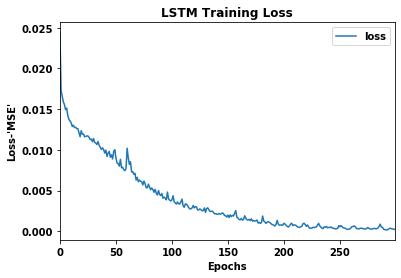

In [38]:
# Training loss plot
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

In [39]:
# Determining all LSTM predicted values so as to compare them with the actual test values 
n_features = scaled_train_data.shape[1]
test_outputs = []
batch = scaled_train_data[-length:].reshape((1, length, n_features))

for i in range(len(test_data)):
    test_out = model.predict(batch)[0]
    test_outputs.append(test_out) 
    batch = np.append(batch[:,1:,:],[[test_out]],axis=1)



In [40]:
# Applying the inverse_transform function to the test_outputs to get their original values
true_outputs = scaler.inverse_transform(test_outputs)


In [41]:
# Converting the true_outputs from np.ndarray to pandas dataframe
true_outputs = pd.DataFrame(data=true_outputs,columns=test_data.columns,index=test_data.index)


In [42]:
# Predicted values - first 5 predictions
true_outputs.head()


,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Date,,,,
2009-12-14/2009-12-20,1.256469,0.141011,5.205353,241.944641
2009-12-21/2009-12-27,1.244411,0.108921,5.153156,242.280291
2009-12-28/2010-01-03,1.170844,0.105604,4.928475,242.280418
2010-01-04/2010-01-10,1.292430,0.131178,5.425426,242.163001
2010-01-11/2010-01-17,1.050295,0.143118,4.386558,241.940568


In [43]:
# Target values so as to compare them with the predicted ones in the previous cell
test_data.head()

,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Date,,,,
2009-12-14/2009-12-20,1.184548,0.102962,4.846726,246.609485
2009-12-21/2009-12-27,1.467341,0.121510,6.051111,244.797399
2009-12-28/2010-01-03,1.291848,0.128702,5.381250,242.427417
2010-01-04/2010-01-10,0.920572,0.127467,3.909127,240.588849
2010-01-11/2010-01-17,1.362677,0.149743,5.659855,243.906723


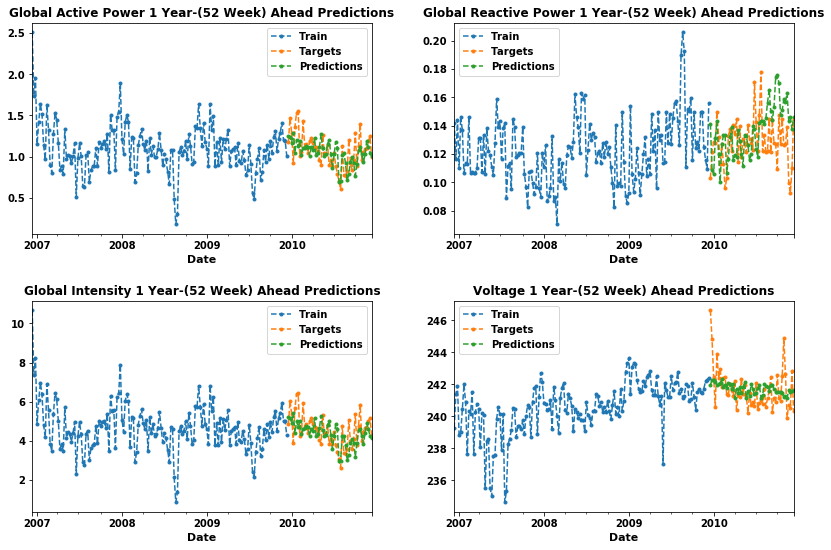

In [47]:
# Plots presenting the actual vs. predicted values for all examined time series. In terms of the predictions related to the
# 'Global_active_power','Global_reactive_power' and 'Global_intensity'(stationary) time series, LSTM has exhibited good 
# forecasting performance as its outputs do not deviate significantly from targets. LSTM managed to capture the trend of all
# the aforementioned time series, which consisted of a significant number of fluctuations & outliers. On the other hand, the 
# LSTM forecasting performance with respect to the 'Voltage' time series has not been at the same high level of efficiency   
# as the model failed to successfully predict the fluctuations of this non-stationary time series. Despite that, the model 
# did manage to capture the main trend of this series as well.
# By taking into consideration the training samples number, the strong presence of fluctuations/outliers, and the relatively
# long prediction horizon (with respect to the size of the training set), it can be concluded that the LSTM forecasting
# performance has been of high quality and that is reflected on the model's performance metric(RMSE) score that is provided  
# in the following cells.
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))

datapred['Global_active_power'][:-test_index].plot(linestyle='--',marker='.',ax=axes[0,0],label='Train')
test_data['Global_active_power'].plot(linestyle='--',marker='.',ax=axes[0,0],label='Targets')
true_outputs['Global_active_power'].plot(linestyle='--',marker='.',ax=axes[0,0],label='Predictions')
axes[0,0].set_title ('Global Active Power 1 Year-(52 Week) Ahead Predictions',fontweight='bold',fontsize=12)
axes[0,0].legend()

datapred['Global_reactive_power'][:-test_index].plot(linestyle='--',marker='.',ax=axes[0,1],label='Train')
test_data['Global_reactive_power'].plot(linestyle='--',marker='.',ax=axes[0,1],label='Targets')
true_outputs['Global_reactive_power'].plot(linestyle='--',marker='.',ax=axes[0,1],label='Predictions')
axes[0,1].set_title ('Global Reactive Power 1 Year-(52 Week) Ahead Predictions',fontweight='bold',fontsize=12)
axes[0,1].legend()

datapred['Global_intensity'][:-test_index].plot(linestyle='--',marker='.',ax=axes[1,0],label='Train')
test_data['Global_intensity'].plot(linestyle='--',marker='.',ax=axes[1,0],label='Targets')
true_outputs['Global_intensity'].plot(linestyle='--',marker='.',ax=axes[1,0],label='Predictions')
axes[1,0].set_title ('Global Intensity 1 Year-(52 Week) Ahead Predictions',fontweight='bold',fontsize=12)
axes[1,0].legend()

datapred['Voltage'][:-test_index].plot(linestyle='--',marker='.',ax=axes[1,1],label='Train')
test_data['Voltage'].plot(linestyle='--',marker='.',ax=axes[1,1],label='Targets')
true_outputs['Voltage'].plot(linestyle='--',marker='.',ax=axes[1,1],label='Predictions')
axes[1,1].set_title ('Voltage 1 Year-(52 Week) Ahead Predictions',fontweight='bold',fontsize=12)
axes[1,1].legend()
for ax in axes.flat:
    ax.figure.tight_layout(pad=2)
    ax.set_xlabel('Date',fontweight='bold',fontsize=11)


In [45]:
# Importing the metrics
from sklearn.metrics import mean_squared_error



In [46]:
# Root Mean Squared Error
rmse_active=np.sqrt(mean_squared_error(test_data['Global_active_power'],true_outputs['Global_active_power']))
rmse_reactive=np.sqrt(mean_squared_error(test_data['Global_reactive_power'],true_outputs['Global_reactive_power']))
rmse_intensity=np.sqrt(mean_squared_error(test_data['Global_intensity'],true_outputs['Global_intensity']))
rmse_voltage=np.sqrt(mean_squared_error(test_data['Voltage'],true_outputs['Voltage']))
rmse_active=rmse_active.round(2)
rmse_reactive=rmse_reactive.round(2)
rmse_intensity=rmse_intensity.round(2)
rmse_voltage=rmse_voltage.round(2)
print('Global Active Power RMSE: ', rmse_active)
print('Global Reactive Power RMSE: ', rmse_reactive)
print('Global Intensity RMSE: ', rmse_intensity)
print('Voltage RMSE: ', rmse_voltage)

Global Active Power RMSE:  0.2
Global Reactive Power RMSE:  0.02
Global Intensity RMSE:  0.81
Voltage RMSE:  1.25
